In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv("C:\\Users\\sniks\\Downloads\\dft-road-casualty-statistics-collision-2024.csv")

C:\Users\sniks\AppData\Local\Temp\ipykernel_2524\338067758.py:1: DtypeWarning: Columns (0,2,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\sniks\\Downloads\\dft-road-casualty-statistics-collision-2024.csv")


In [4]:
print(f'Dataset:{df.shape[0]} collisions, {df.shape[1]} features')

Dataset:100927 collisions, 44 features


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['hour'] = pd.to_datetime(df['time'], format = '%H:%M', errors='coerce').dt.hour
df['day_of_week_name'] = pd.to_datetime(df['date']).dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['collision_year']

In [6]:
print("Collisions by Day of Week:")
day_mapping = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}
df['day_name'] = df['day_of_week'].map(day_mapping)
print(df['day_name'].value_counts())

Collisions by Day of Week:
day_name
Friday       16444
Thursday     15461
Wednesday    14915
Tuesday      14897
Monday       14051
Saturday     13771
Sunday       11388
Name: count, dtype: int64


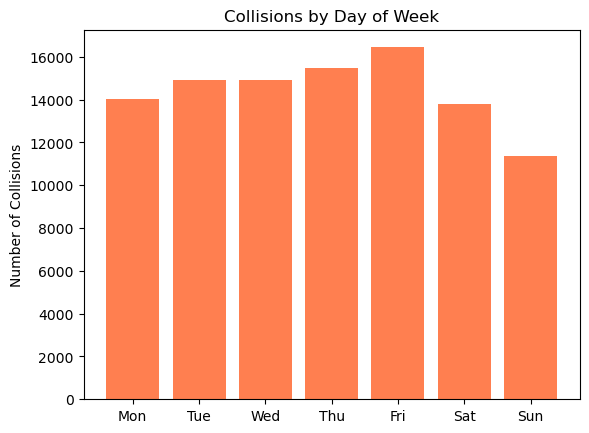

In [7]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = df['day_name'].value_counts().reindex(day_order)
plt.bar(range(7), day_data.values, color='coral')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Number of Collisions')
plt.title('Collisions by Day of Week')
plt.show()

Near to weekend days also observe a fairlyhigh amount of accidents

In [8]:
print('Collisions by Hour of Day')
hourly_counts = df['hour'].value_counts().sort_index()
print(hourly_counts)

Collisions by Hour of Day
hour
0     1646
1     1064
2      774
3      642
4      590
5      940
6     1976
7     4061
8     6603
9     4458
10    4421
11    5121
12    5661
13    5942
14    6435
15    8328
16    8487
17    8784
18    7159
19    5476
20    3872
21    3383
22    2899
23    2205
Name: count, dtype: int64


Text(0, 0.5, 'Number of Collisions')

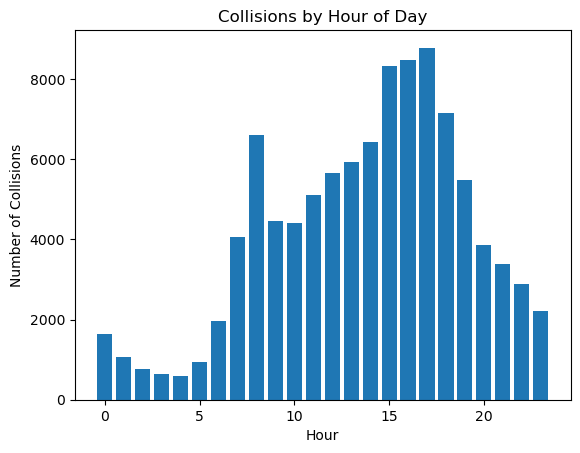

In [9]:
hourly_data = df['hour'].value_counts().sort_index()
plt.bar(hourly_data.index, hourly_data.values)
plt.title('Collisions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Collisions')

Most of the collisions are observed to be during evening rush hours and morning working hours and least during the resting night hours.

In [10]:
print('Collision by Month')
print(df['month_name'].value_counts())

Collision by Month
month_name
December     3473
September    3466
May          3392
November     3370
October      3343
February     3337
April        3320
June         3285
March        3229
August       3205
January      3131
July         3020
Name: count, dtype: int64


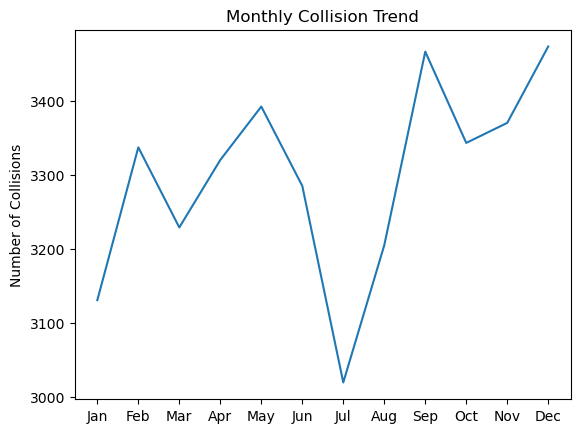

In [11]:
month_data = df['month'].value_counts().sort_index()
months = ['Jan','Feb','Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_data.index,month_data.values)
plt.xticks(range(1,13),months)
plt.title('Monthly Collision Trend')
plt.ylabel('Number of Collisions')
plt.show()

September blessed by ample rain and December covered with fog also contribute to the cause

In [12]:
print('Geographic Coverage')
print(f"Latitude range : {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"Longitude range : {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")
print('Top 15 high risk local authorities')
print(df['local_authority_ons_district'].value_counts().head(15))

Geographic Coverage
Latitude range : 49.9122 to 60.3448
Longitude range : -7.3887 to 1.7562
Top 15 high risk local authorities
local_authority_ons_district
E08000025    2296
E08000035    1463
E09000033    1094
E06000065    1043
E08000032    1030
E06000052     941
E09000008     933
E09000010     922
E09000030     901
E06000054     880
E09000028     875
E09000022     874
E06000066     864
E08000012     841
E06000023     841
Name: count, dtype: int64


Urban Hotspots: London boroughs (Westminster, Croydon, Enfield, Tower Hamlets, Southwark, Lambeth) and major cities (Birmingham, Leeds, Liverpool, Bradford) show high accident counts due to dense traffic, complex road networks, and pedestrian activity.

Rural Risk Areas: Cornwall, Somerset, Wiltshire, and North Yorkshire face severity from high-speed rural roads, poor lighting, and seasonal tourism.

In [13]:
print('Weather Condition')
weather_map = {1:'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4:'Fine + high winds', 5:'Raining + high winds', 6:'Snowing = high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown'}
df['weather_desc'] = df['weather_conditions'].map(weather_map)
print(df['weather_desc'].value_counts())

Weather Condition
weather_desc
Fine no high winds       79601
Raining no high winds    12328
Unknown                   3145
Other                     3052
Raining + high winds      1125
Fine + high winds          935
Fog or mist                474
Snowing no high winds      242
Snowing = high winds        25
Name: count, dtype: int64


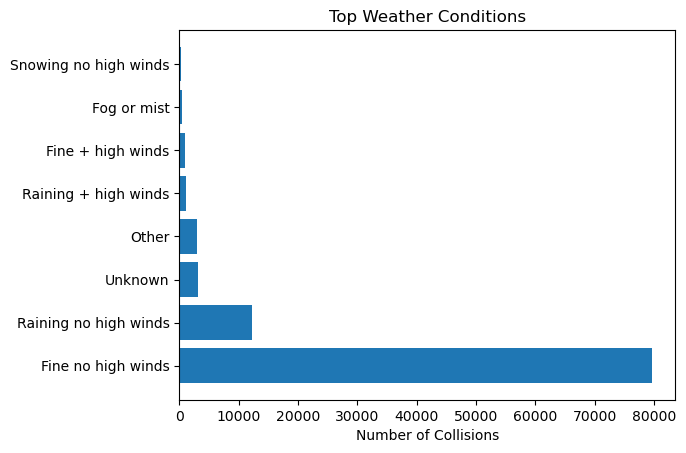

In [14]:
weather_data = df['weather_desc'].value_counts().head(8)
plt.barh(range(len(weather_data)), weather_data.values)
plt.yticks(range(len(weather_data)), weather_data.index)
plt.title('Top Weather Conditions')
plt.xlabel('Number of Collisions')
plt.show()

Most accidents still happen in fine condition, likely due to higher traffic volume and risk-taking behaviour. Adverse weather (rain, fog, snow) contributes approx. 18% of incidents too

In [16]:
print('Light Conditions Distribution')
light_map = {1: 'Daylight', 4:'Darkness - lights lit', 5: 'Darkness - lights unlit', 6:'Darkness - no lighting', 7: 'Darkness - lighting unknown' }
df['light_desc'] = df['light_conditions'].map(light_map)
print(df['light_desc'].value_counts())

Light Conditions Distribution
light_desc
Daylight                       71550
Darkness - lights lit          21241
Darkness - no lighting          5695
Darkness - lighting unknown     1679
Darkness - lights unlit          756
Name: count, dtype: int64


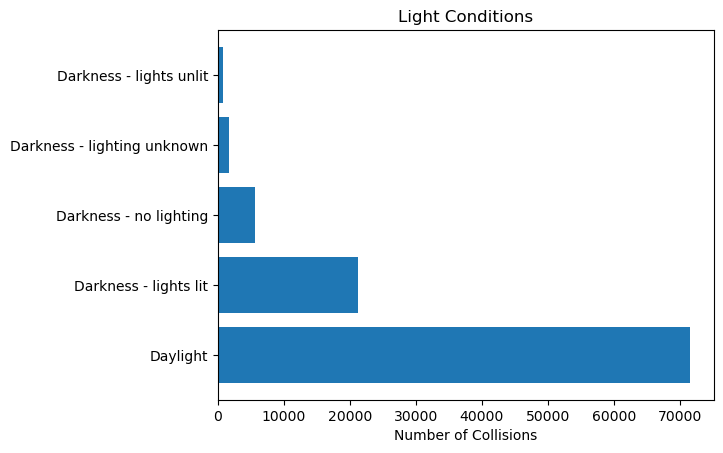

In [19]:
light_data = df['light_desc'].value_counts()
plt.barh(range(len(light_data)), light_data.values)
plt.yticks(range(len(light_data)), light_data.index)
plt.title('Light Conditions')
plt.xlabel('Number of Collisions')
plt.show()

Daylight does not equal to safety. High traffic volume drives accident frequency.
Lighting quality matters: 32% approx of accidents occur in some form of darkness

In [24]:
print("Road Type Distribution")
road_type_map = {1:'Roundabout', 2:'One way street', 3: 'Dual carriageway', 6: 'Single Carriageway', 9: 'Unknown', 12: 'One way/slip road'}
df['road_type_desc'] = df['road_type'].map(road_type_map)
print(df['road_type_desc'].value_counts())

Road Type Distribution
road_type_desc
Single Carriageway    73618
Dual carriageway      14671
Roundabout             6204
Unknown                2568
One way street         2224
Name: count, dtype: int64


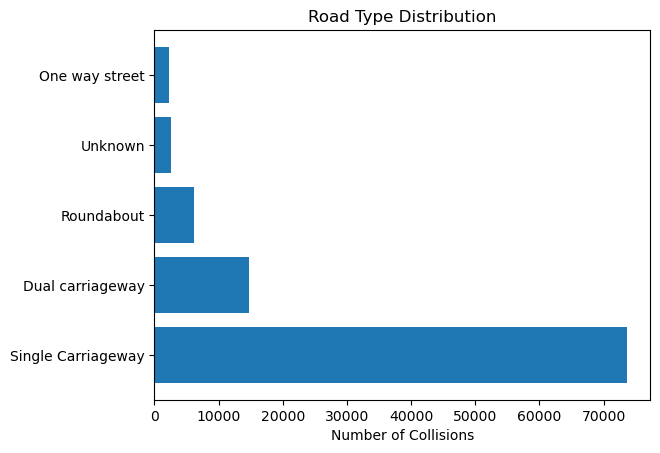

In [25]:
road_data = df['road_type_desc'].value_counts()
plt.barh(range(len(road_data)), road_data.values)
plt.yticks(range(len(road_data)),road_data.index)
plt.title('Road Type Distribution')
plt.xlabel('Number of Collisions')
plt.show()

In [26]:
print('Speed Limit Distributions')
print(df['speed_limit'].value_counts().sort_index())

Speed Limit Distributions
speed_limit
-1         3
 20    18881
 30    50257
 40     8949
 50     4678
 60    12709
 70     5450
Name: count, dtype: int64


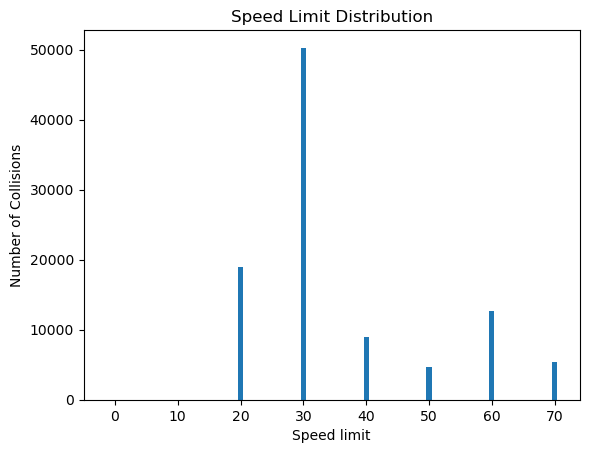

In [27]:
speed_data = df['speed_limit'].value_counts().sort_index()
plt.bar(speed_data.index, speed_data.values)
plt.title('Speed Limit Distribution')
plt.xlabel('Speed limit')
plt.ylabel('Number of Collisions')
plt.show()

20-30 mph account for nearly 70% of accidents, highlighting the need for better pedestrian safety 50-70 mph contribute fewer accidents but likely with greater seveerity

In [28]:
print("Urban vs Rural")
urban_map = {1:'Urban', 2:'Rural', 3:'Unallocated'}
df['area_type'] = df['urban_or_rural_area'].map(urban_map)
print(df['area_type'].value_counts())


Urban vs Rural
area_type
Urban          67304
Rural          33620
Unallocated        3
Name: count, dtype: int64


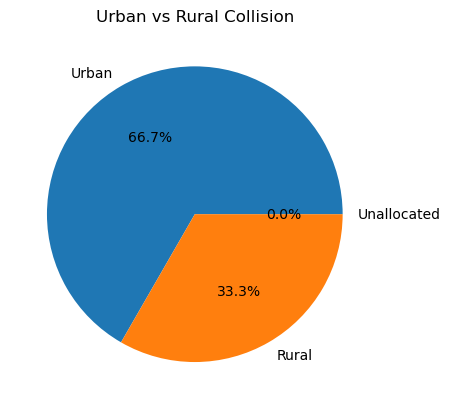

In [31]:
area_data = df['area_type'].value_counts()
plt.pie(area_data.values, labels = area_data.index, autopct='%1.1f%%')
plt.title('Urban vs Rural Collision')
plt.show()

Urban areas dominate accident frequency, driven by volume and complexity

In [33]:
print('Multi Factor Severity prediction For Emergency Response')
severity_map = {1: 'Fatal', 2:'Serious', 3:'Slight'}
df['severity_desc'] = df['collision_severity'].map(severity_map)
severity_counts = df['severity_desc'].value_counts()

print(f"\nTotal Casualties: {df['number_of_casualties'].sum():,}")
print(f"Average Casualties per Collision: {df['number_of_casualties'].mean():.2f}")
print(f"\nTotal Vehicles Involved: {df['number_of_vehicles'].sum():,}")
print(f"Average Vehicles per Collision: {df['number_of_vehicles'].mean():.2f}")

Multi Factor Severity prediction For Emergency Response

Total Casualties: 128,272
Average Casualties per Collision: 1.27

Total Vehicles Involved: 183,514
Average Vehicles per Collision: 1.82


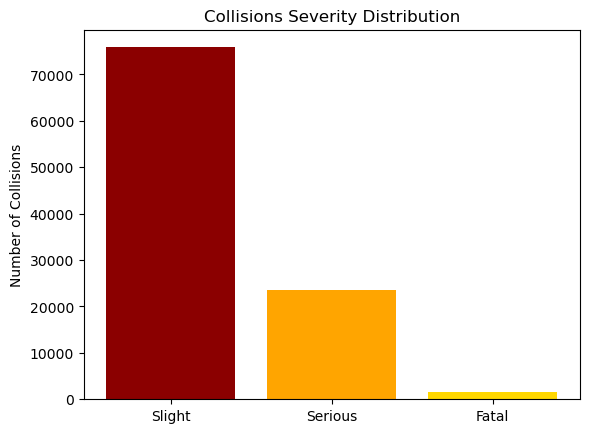

In [39]:
severity_data = df['severity_desc'].value_counts()
colors = ['darkred', 'orange', 'gold']
plt.bar(severity_data.index, severity_data.values, color=colors)
plt.title('Collisions Severity Distribution')
plt.ylabel('Number of Collisions')
plt.show()

Most incidents are minor, but still require traffic management

In [41]:
print('Severity by Time factor')
severity_by_hour = df.groupby('hour').agg({'collision_severity':'mean','number_of_casualties': 'mean',
    'collision_index': 'count'})
severity_by_hour.columns = ['Avg_Severity', 'Avg_Casualties', 'Count']
print(severity_by_hour.sort_values('Avg_Severity'))

Severity by Time factor
      Avg_Severity  Avg_Casualties  Count
hour                                     
0         2.650668        1.386391   1646
2         2.655039        1.397933    774
23        2.665760        1.317460   2205
4         2.669492        1.298305    590
1         2.670113        1.334586   1064
3         2.674455        1.336449    642
22        2.680235        1.333563   2899
5         2.692553        1.255319    940
21        2.694059        1.315401   3383
6         2.695344        1.221660   1976
20        2.706612        1.301136   3872
19        2.729364        1.268992   5476
13        2.731235        1.292494   5942
10        2.738973        1.254241   4421
11        2.740480        1.297793   5121
12        2.740859        1.282636   5661
14        2.742657        1.279254   6435
7         2.742920        1.191086   4061
16        2.751856        1.268175   8487
17        2.752505        1.262295   8784
9         2.753477        1.230148   4458
18        

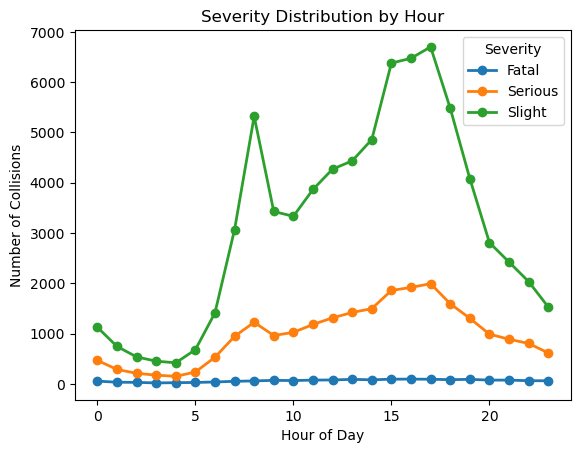

In [44]:
severity_hour_pivot = df.groupby(['hour', 'severity_desc']).size().unstack(fill_value=0)
severity_hour_pivot.plot(kind='line', marker='o', linewidth=2, ax=plt.gca())
plt.title('Severity Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.legend(title='Severity')

Morning peak (8-9 AM) shows highest severity likely due to rushed behaviour and mixed road users

Late night (0-4 AM) has fewer collisions but elevated severity and casualty rates that is critical for emergency resources allocation

Midday to evening (10AM - 6PM) maintains high volume and consistent severity that requires sustained emergency coverage

In [56]:
print('Severity by day of week')
severity_by_day = df.groupby('day_name').agg({'collision_index': 'count'}).round(2)
severity_by_day.columns = ['Count']
print(severity_by_day.sort_values('Count'))

Severity by day of week
           Count
day_name        
Sunday     11388
Saturday   13771
Monday     14051
Tuesday    14897
Wednesday  14915
Thursday   15461
Friday     16444


Midweek (Tue–Thu) shows highest severity, demanding consistent EMS readiness.

Weekends have slightly lower severity but higher casualty rates, suggesting more serious individual injuries per crash.

Monday and Friday bridge work and leisure patterns—accident volume and severity remain elevated

In [55]:
print('Severity by environmental conditions')
severity_weather = df.groupby('weather_desc').agg({'collision_index': 'count'
}).round(2)
severity_weather.columns = ['Count']
print(severity_weather.sort_values('Count'))

Severity by environmental conditions
                       Count
weather_desc                
Snowing = high winds      25
Snowing no high winds    242
Fog or mist              474
Fine + high winds        935
Raining + high winds    1125
Other                   3052
Unknown                 3145
Raining no high winds  12328
Fine no high winds     79601


Clear weather does not mean low severity: Most accidents occur in fine conditions due to volume and risk-taking.

Adverse weather (rain, fog, snow) raises severity and casualty rates—critical for EMS alerting and road treatment planning.

Fog stands out for highest average casualties, demanding visibility-focused interventions.

In [54]:
print("\nSeverity by Light Conditions:")
severity_light = df.groupby('light_desc').agg({'collision_index': 'count'}).round(2)
severity_light.columns = ['Count']
print(severity_light.sort_values('Count'))


Severity by Light Conditions:
                             Count
light_desc                        
Darkness - lights unlit        756
Darkness - lighting unknown   1679
Darkness - no lighting        5695
Darkness - lights lit        21241
Daylight                     71550


Daylight and well-lit darkness dominate accident counts and severity.

Poor or absent lighting correlates with higher casualty rates, demanding targeted infrastructure upgrades and visibility interventions.

In [53]:
print("Severity by road")
road_surface_map = {1: 'Dry', 2: 'Wet/damp', 3: 'Snow', 4: 'Frost/ice', 5: 'Flood', 6: 'Oil', 7: 'Mud'}
df['road_surface_desc'] = df['road_surface_conditions'].map(road_surface_map)
severity_surface = df.groupby('road_surface_desc').agg({'collision_index': 'count'}).round(2)
severity_surface.columns = ['Count']
print(severity_surface.sort_values('Count'))

Severity by road
                   Count
road_surface_desc       
Snow                 159
Flood                192
Frost/ice           1015
Wet/damp           25355
Dry                71832


Dry roads dominate volume, but adverse surfaces (snow, ice, flood) show higher severity and casualty rates

In [52]:
print("\nSeverity by Speed Limit:")
severity_speed = df.groupby('speed_limit').agg({'collision_index': 'count'
}).round(2)
severity_speed.columns = ['Count']
print(severity_speed.sort_values('Count'))


Severity by Speed Limit:
             Count
speed_limit       
-1               3
 50           4678
 70           5450
 40           8949
 60          12709
 20          18881
 30          50257


Lower speed zones (20–30 mph) show higher severity, likely due to pedestrian involvement and urban complexity.

Higher speed zones (60–70 mph) show fewer incidents but higher casualty rates, emphasizing the need for rapid EMS response and trauma readiness.

In [57]:
print("Junction analysis")
junction_map = {0: 'Not at junction', 1: 'Roundabout', 2: 'Mini-roundabout', 3: 'T/staggered junction', 5: 'Slip road', 6: 'Crossroads', 7: 'More than 4 arms', 8: 'Private drive', 9: 'Other junction'}
df['junction_desc'] = df['junction_detail'].map(junction_map)
print("\nCollisions by Junction Type:")
junction_counts = df['junction_desc'].value_counts()
print(junction_counts)

Junction analysis

Collisions by Junction Type:
junction_desc
Not at junction    46139
Name: count, dtype: int64


~46% of all collisions occur away from junctions, suggesting that mid-block segments (e.g., straight roads, rural stretches, or high-speed zones) are a major contributor to accident volume and severity.

In [59]:
print("Road classs analysis")
road_class_map = {1: 'Motorway', 2: 'A(M)', 3: 'A', 4: 'B', 5: 'C', 6: 'Unclassified'}
df['first_road_class_desc'] = df['first_road_class'].map(road_class_map)
print(df['first_road_class_desc'].value_counts())

Road classs analysis
first_road_class_desc
A               44142
Unclassified    36466
B               12677
C                4384
Motorway         3029
A(M)              229
Name: count, dtype: int64


A roads [Primary roads connecting major cities and regions.] (44%) 

Unclassified roads (36%) account for ~80% of collisions, indicating high exposure and infrastructure gaps.

B and C roads (combined ~17%) [Secondary roads linking smaller towns and local areas.] show moderate risk, often serving as connectors with mixed traffic.

Motorways (3%) and A(M) roads (0.2%) have low collision counts but may involve higher severity due to speed

In [63]:
print("CORRELATION ANALYSIS")

numeric_cols = ['collision_severity', 'number_of_vehicles', 'number_of_casualties', 'speed_limit', 'hour', 'day_of_week', 'month', 'weather_conditions', 'light_conditions', 'road_surface_conditions', 'urban_or_rural_area']
correlations = df[numeric_cols].corr()['collision_severity'].abs().sort_values(ascending=False)
print(correlations)

CORRELATION ANALYSIS
collision_severity         1.000000
number_of_casualties       0.099873
speed_limit                0.097446
urban_or_rural_area        0.090886
number_of_vehicles         0.058305
light_conditions           0.049063
weather_conditions         0.043878
road_surface_conditions    0.039464
day_of_week                0.005446
hour                       0.003359
month                      0.001953
Name: collision_severity, dtype: float64


No single factor shows strong correlation with severity highlighting the need for multi-factor models that capture nonlinear interactions and contextual dependencies for accurate severity prediction.

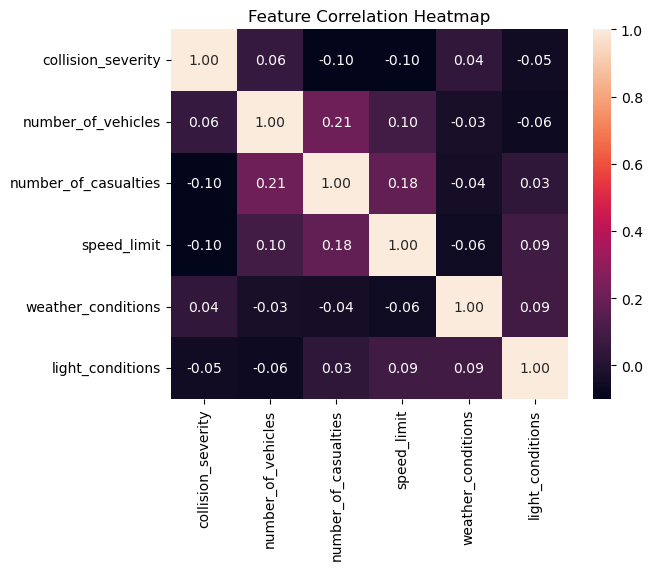

In [64]:
corr_features = ['collision_severity', 'number_of_vehicles', 'number_of_casualties',
                 'speed_limit', 'weather_conditions', 'light_conditions']
corr_matrix = df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()